<a href="https://colab.research.google.com/github/VorobyvEgor/Seminar_Sber/blob/main/Seminars/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 3.2: Углубленное знакомство с библиотекой pandas и первичный анализ данных.

На этом занятии мы познакомимся с самыми базовыми вариантами визуализации данных при помощи pandas+matplotlib, а также обсудим для чего они применяются.

## Загрузим данные и посмотрим на них 

На данном семинаре мы будем использовать набор данных [`Campus Recruitment`](https://www.kaggle.com/benroshan/factors-affecting-campus-placement).
Этот датасет предназначен для предсказания того, будет ли размещен студент в кампусе на основе его образования, заработка и других признаков, которыем мы и будем анализировать.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#магическая команда, указывает, что графики нужно строить прямо в ноутбуке: 
%matplotlib inline 

In [ ]:
#так нужно делать только в Google Colab
%%capture
!wget https://www.dropbox.com/s/rykuoongm15y56u/Placement_Data_Full_Class.csv

In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Как уже говорилось, данный датасет изначально был предназначен для решения задачи классификации, классы: "Placed" и "Not Placed". Объектами являются люди, которые описываются признаками.

Видим 15 колонок, что соответствует 13 признакам, одному id и одному таргету (то есть метке класса, целевой переменной), и 215 строк, что соответствует 215 людям

Посмотрим на описание столбцов:

| Column name | Column name description |
|:-----------|:-----------------------|
| sl_no       |      Serial Number      |
| gender | Gender: Male='M',Female='F'
| ssc_p | Secondary Education percentage: 10th Grade
| ssc_b | Board of Education: Central/Others
| hsc_p | Higher Secondary Education percentage: 12th Grade
| hsc_b | Board of Education: Central/Others
| hsc_s | Specialization in Higher Secondary Education
| degree_p | Degree Percentage
| degree_t | Under Graduation(Degree type): Field of degree education
| workex | Work Experience
| etest_p | Employability test percentage (conducted by college)
| specialisation | Post Graduation(MBA): Specialization
| mba_p | MBA percentage
| status | Status of placement: Placed/Not placed
| salary | Salary offered by corporate to candidates

Первичный анализ данных обычно нужен для того, чтобы понять, насколько у нас большие данные, насколько они "хорошие", какие алгоритмы для них применимы. 

## Составим ряд вопросов, на которые мы хотели бы получить ответы

- пропуски в данных
- типы признаков (количественный, категориальный, бинарный)
- сколько классов, их доля от общего числа объектов
- для категориальных и бинарных признаков определить долю объектов, которые приходятся на каждое из значений
- насколько хорошо отделимы наши классы (первая "разведка" для отбора признаков и решения задачи классификации)
- какие признаки можно считать независимыми


На все вопросы кроме отделимости можно получить ответы и без картинки средствами pandas. На часть из них мы именно так и ответим, однако правильно подобранная визуализация значительно облегчает восприятие.

## Пропуски в данных и типы признаков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Построим гистограмму с помощью метода hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb600c4d50>,
      dtype=object)

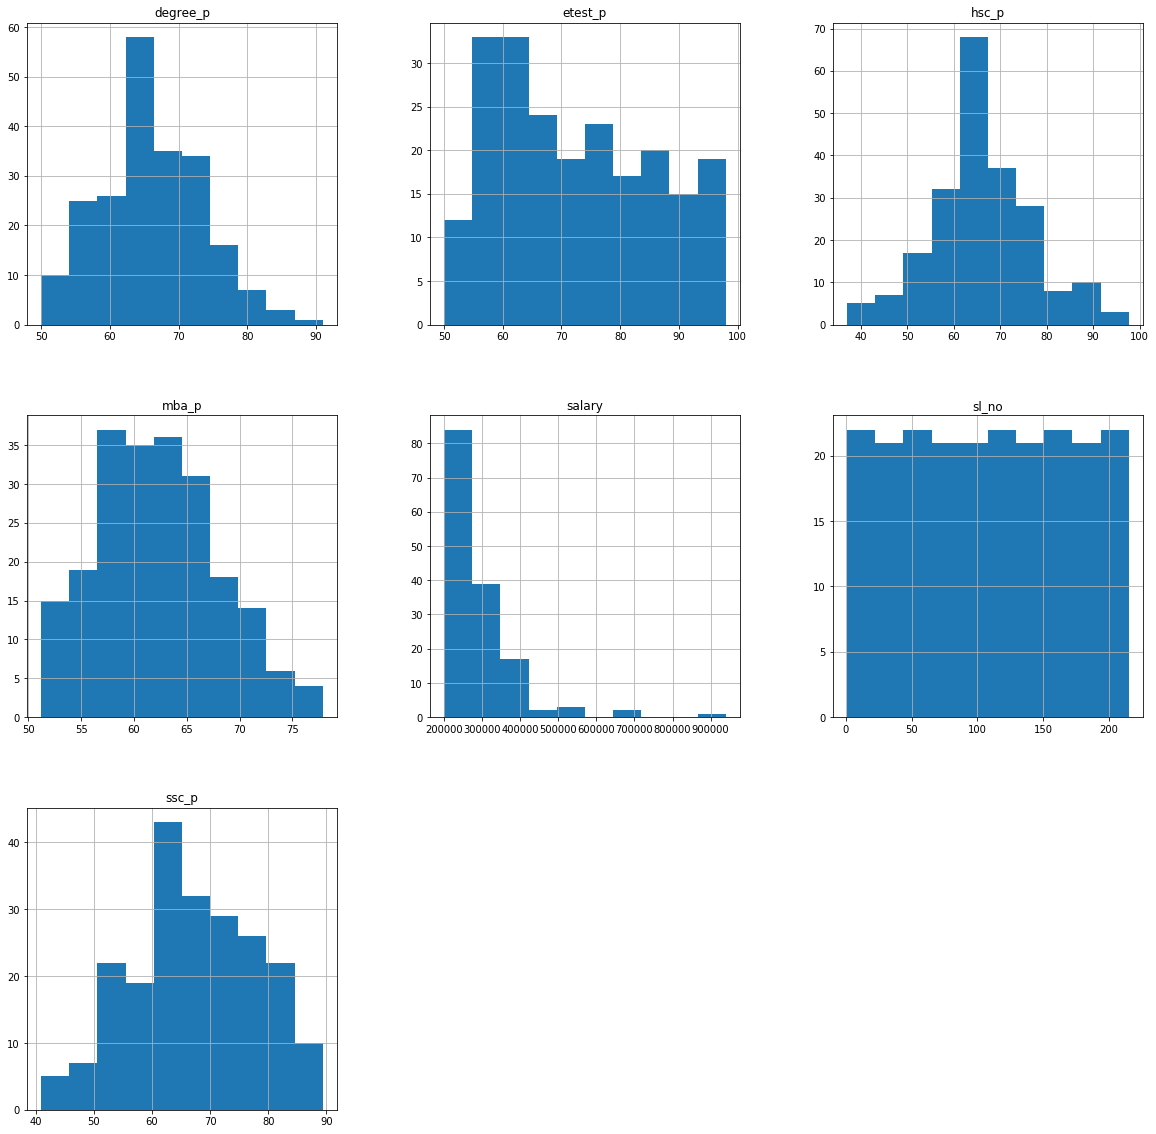

In [ ]:
df.hist(figsize=(20,20))

То есть все числовые признаки действительно являются числовыми, а не категориальными в числовом формате.

Замечание: sl_no это просто индекс.


Более подробный код, дающий больше "свободы":

Text(0.5, 0, 'Salary')

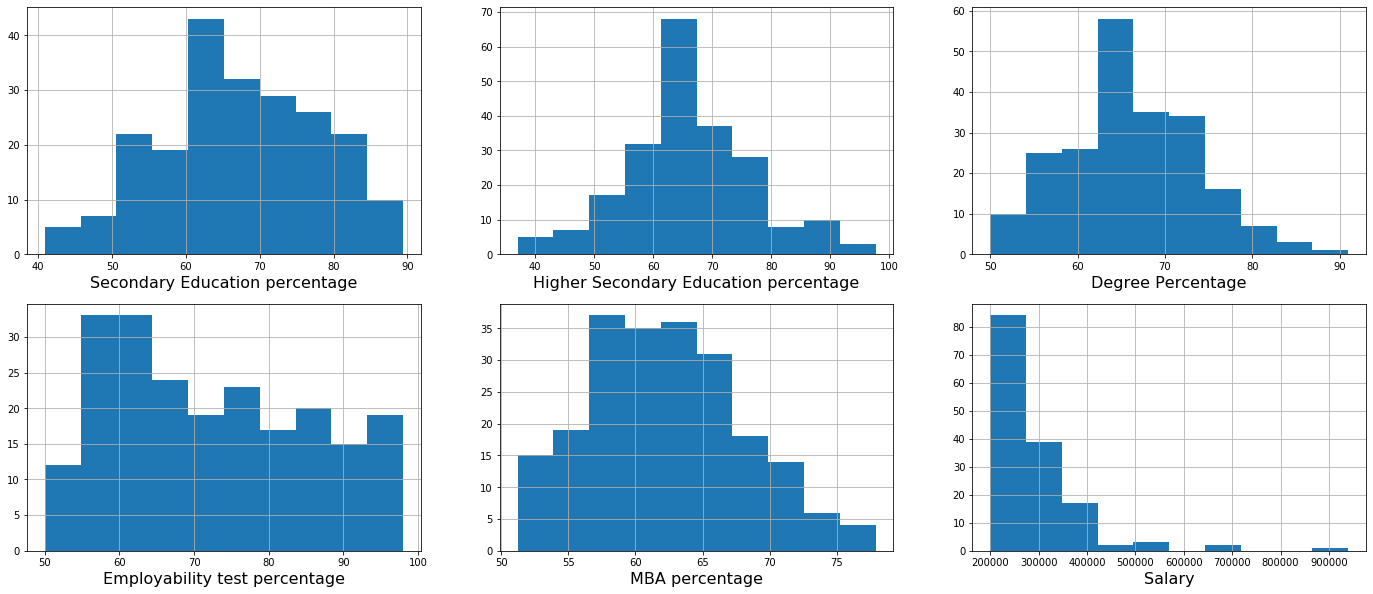

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=3, nrows=2, figsize=(24, 10))

df.ssc_p.hist(ax=ax1[0])
df.hsc_p.hist(ax=ax1[1])
df.degree_p.hist(ax=ax1[2])
df.etest_p.hist(ax=ax2[0])
df.mba_p.hist(ax=ax2[1])
df.salary.hist(ax=ax2[2])

ax1[0].set_xlabel('Secondary Education percentage', size=16)
ax1[1].set_xlabel('Higher Secondary Education percentage', size=16)
ax1[2].set_xlabel('Degree Percentage', size=16)

ax2[0].set_xlabel('Employability test percentage', size=16)
ax2[1].set_xlabel('MBA percentage', size=16)
ax2[2].set_xlabel('Salary', size=16)

## Cколько классов, их доля от общего числа объектов

На этот вопрос удобно отвечать при помощи круговой диаграммы

Text(0, 0.5, 'Status of placement')

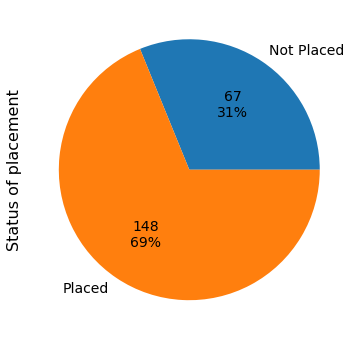

In [ ]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, ax = plt.subplots(ncols=1, figsize=(8, 6))

df.groupby('status').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 14}, ax=ax)
ax.set_ylabel('Status of placement', size=16)

То же самое в более явном виде

In [ ]:
df.groupby('status').size()

status
Not Placed     67
Placed        148
dtype: int64

In [ ]:
df.groupby('status').size().keys()

Index(['Not Placed', 'Placed'], dtype='object', name='status')

In [ ]:
df.groupby('status').size().values

array([ 67, 148])

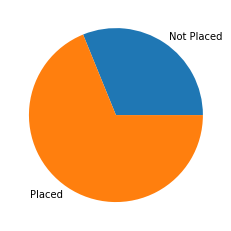

In [ ]:
labels = df.groupby('status').size().keys()
values = df.groupby('status').size().values
plt.pie(values,labels=labels)
plt.show()

Теперь, понимая как это работает, можем добавить украшения

In [ ]:
data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="pla", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

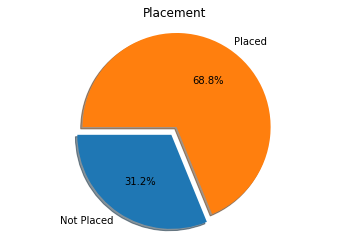

In [ ]:
labels = df.groupby('status').size().keys()
values = df.groupby('status').size().values
explode = [0.1,0]
plt.title('Placement')
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

Обычно для применения алгоритмов нам необходимо понять, сбалансированы ли классы. Здесь соотношение классов такое, что его следует учитывать, но оно не требует специальных методов. А разница в 10 и более раз требовала бы.

### Поместим на одной картинке аналогичные диаграммы для всех категориальных признаков

Text(0, 0.5, 'Post Graduation(MBA)')

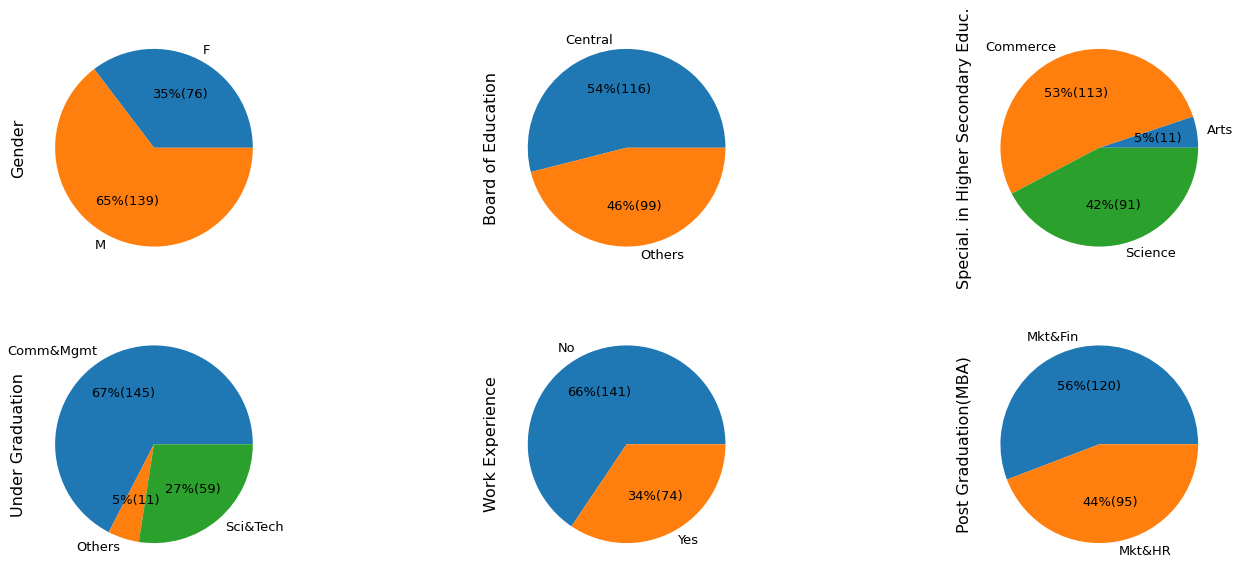

In [ ]:
def label_function(val):
    return f'{val:.0f}%({val / 100 * len(df):.0f})'

fig, (ax1, ax2) = plt.subplots(ncols=3, nrows=2, figsize=(24, 10))
df.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13}, ax = ax1[0])
df.groupby('ssc_b').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13}, ax = ax1[1])
df.groupby('hsc_s').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13}, ax = ax1[2])

df.groupby('degree_t').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13}, ax = ax2[0])
df.groupby('workex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13}, ax = ax2[1])	
df.groupby('specialisation').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 13}, ax = ax2[2])

ax1[0].set_ylabel('Gender', size=16)
ax1[1].set_ylabel('Board of Education', size=16)
ax1[2].set_ylabel('Special. in Higher Secondary Educ.', size=16)

ax2[0].set_ylabel('Under Graduation', size=16)
ax2[1].set_ylabel('Work Experience', size=16)
ax2[2].set_ylabel('Post Graduation(MBA)', size=16)

## Насколько хорошо отделимы наши классы

Для этого используем seaborn (надстройка над matplotlib)

In [ ]:
import seaborn as sns

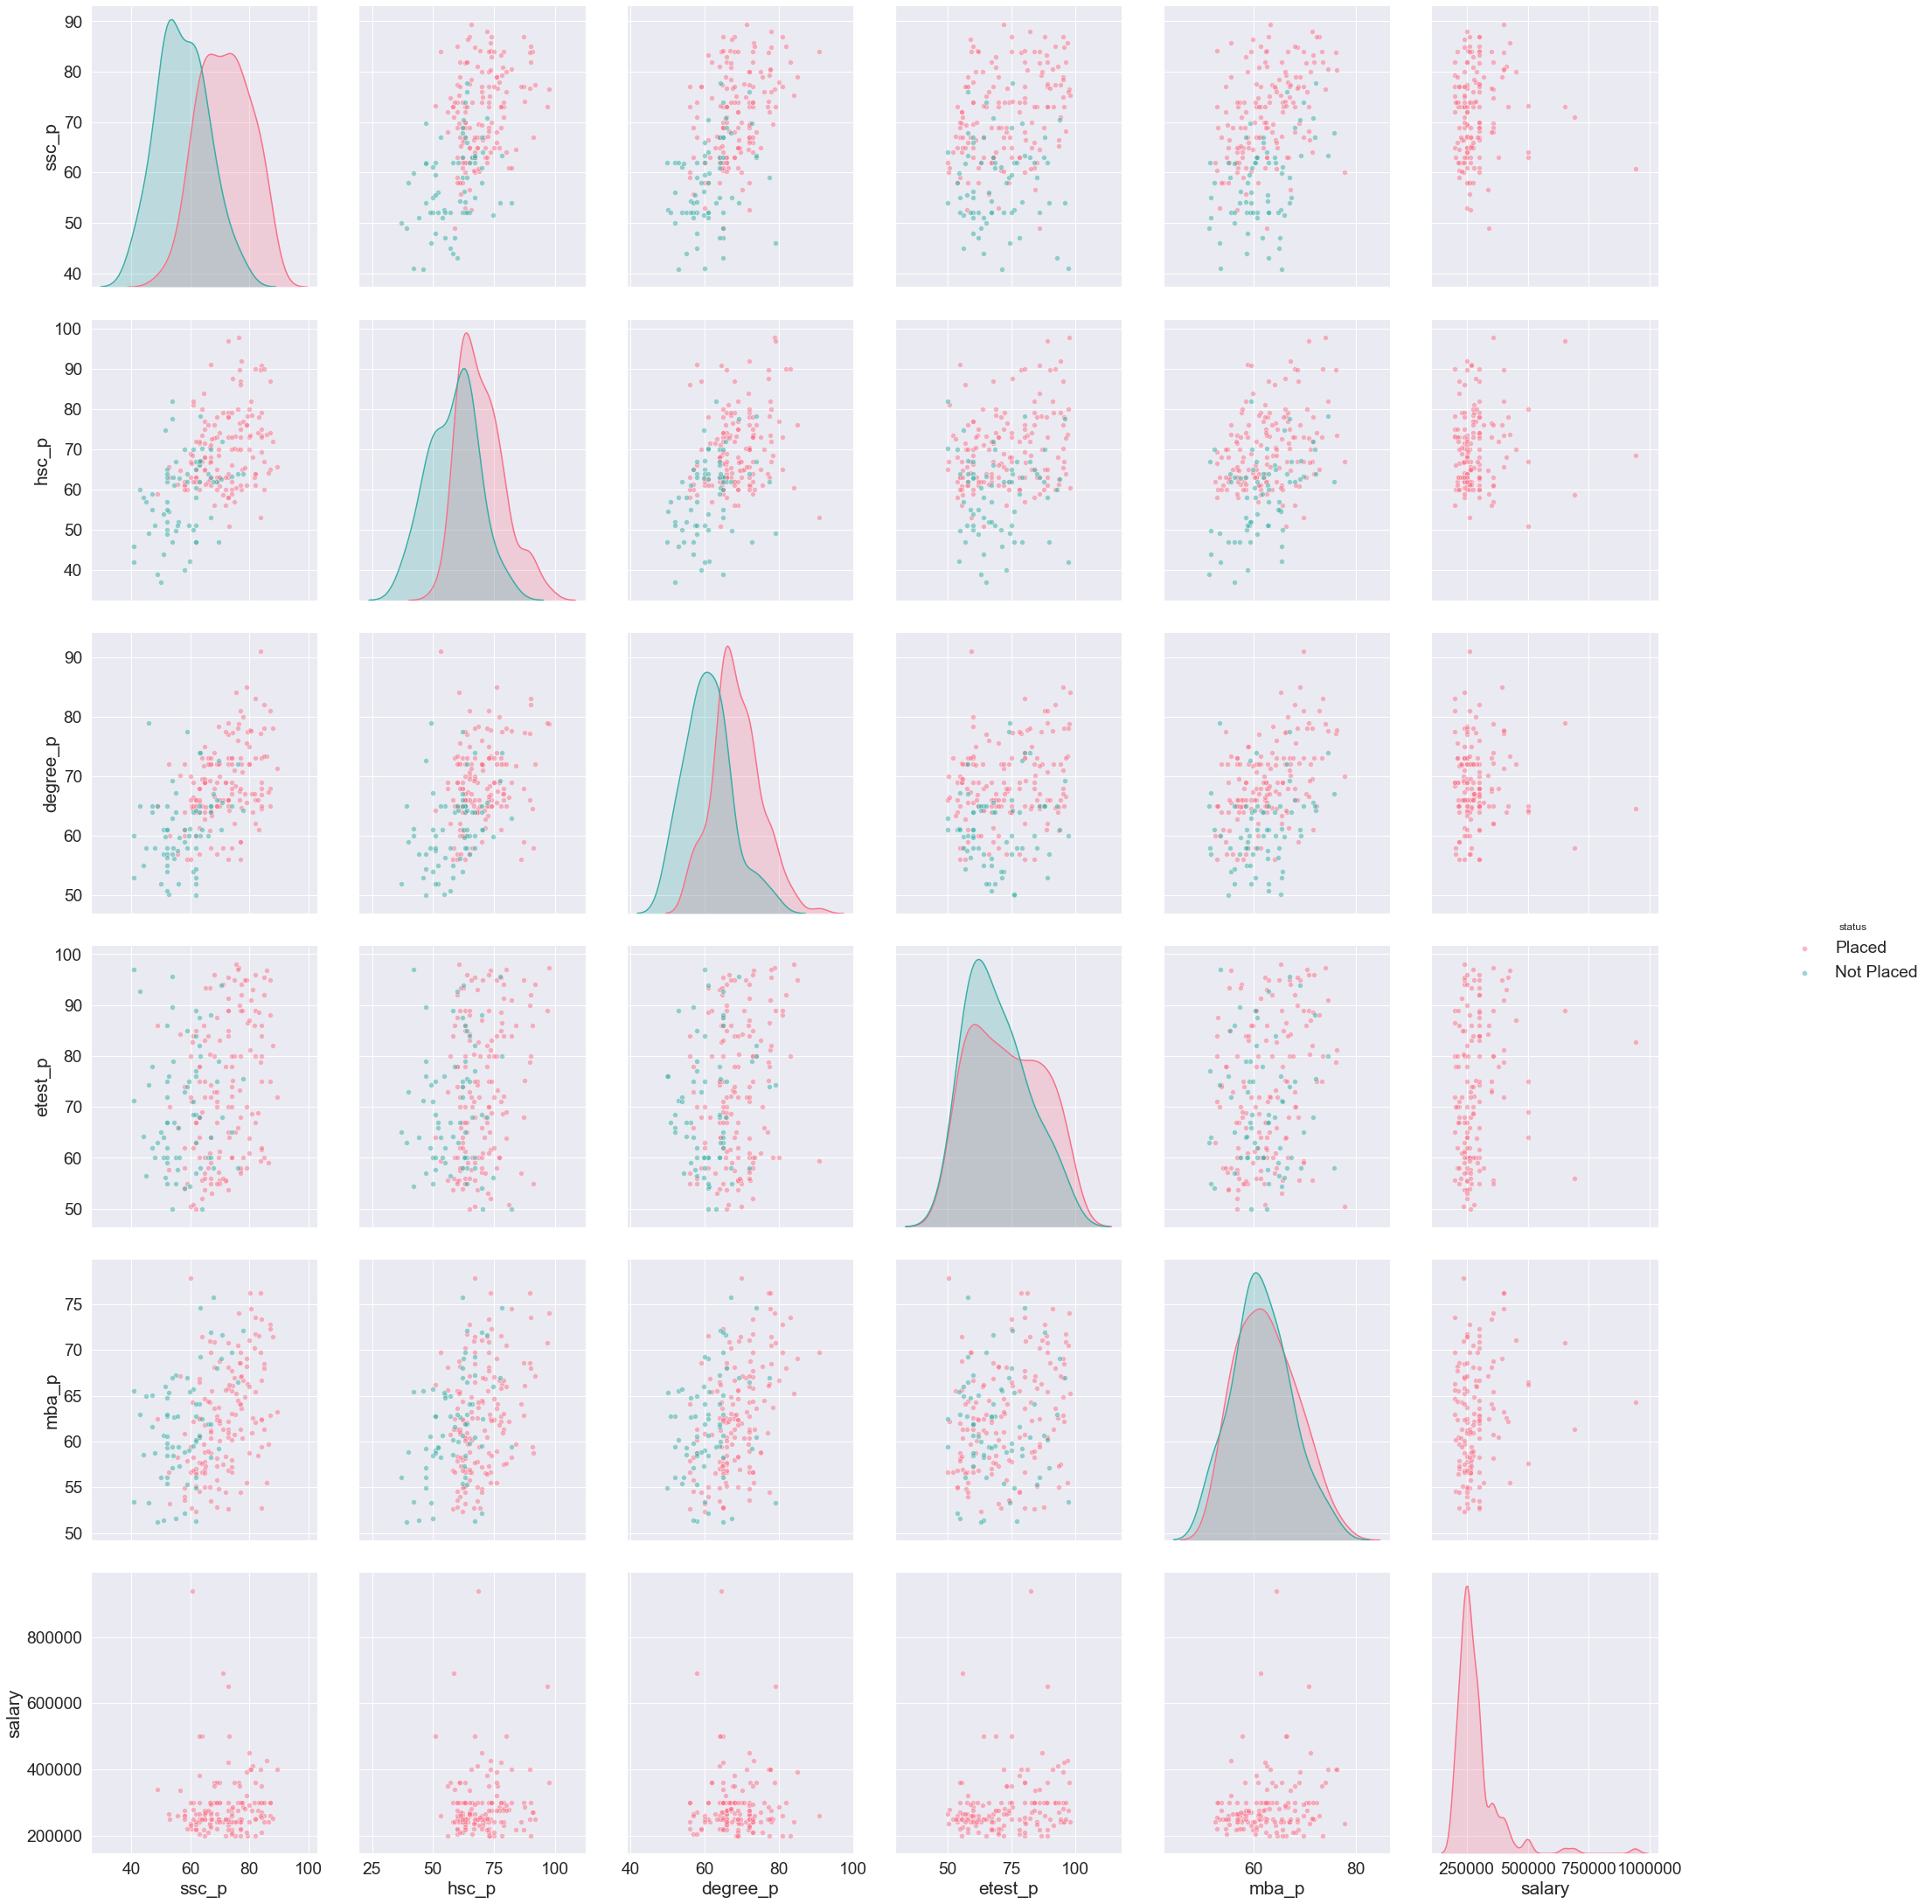

In [ ]:
sns.set(font_scale=1.75)
g = sns.pairplot(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'status']], hue="status", palette="husl", plot_kws=dict(alpha=0.5))
g.fig.set_figheight(31)
g.fig.set_figwidth(31)

### Корреляция между признаками 

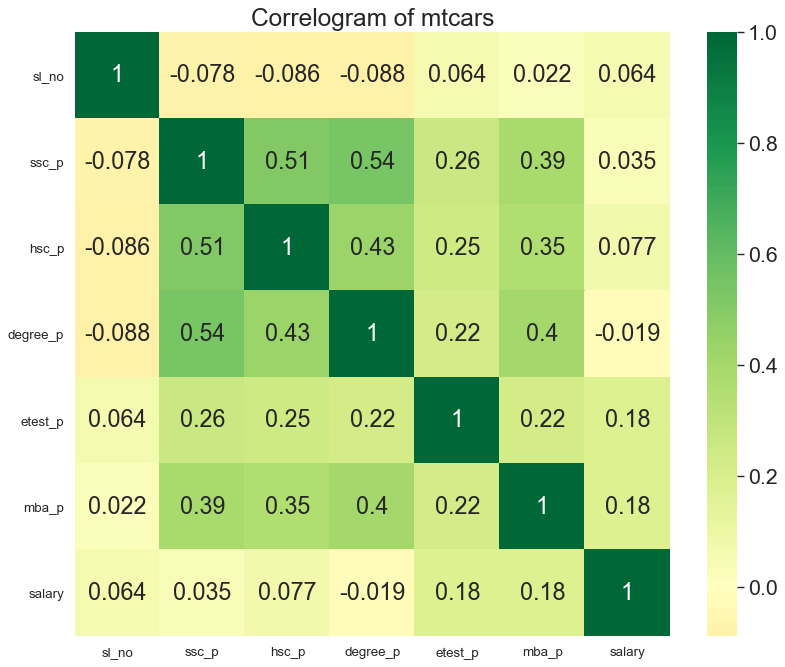

In [ ]:
# Import Dataset
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Campus Recruitment', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Бонус: Несколько уровней индексов в pandas

В Dataframe можно определить иерархическое индексирование для строк и колонок. Для этого необходимо определить массив массивов для параметров index и columns.



In [ ]:
mframe = pd.DataFrame(np.random.randn(16).reshape(4,4),
 			  index=[['i_one','i_one','i_two','i_two'], ['i1','i2','i1','i2']],
 			  columns=[['c_one','c_one','c_two','c_two'], ['c1','c2','c1','c2']])
mframe

c_one               c_two          
                c1        c2        c1        c2
i_one i1 -0.027465 -1.159636 -0.689480  0.460334
      i2 -2.759869 -1.242462  1.642405  0.822922
i_two i1 -0.418237  0.217908 -0.036301 -0.558024
      i2 -0.896661  1.024332 -0.032912  0.817317